<a href="https://colab.research.google.com/github/abh886/FIR-filters/blob/master/Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

enter passband edge frequency:1000
enter stopband edge frequency:2000
enter order of filter26
enter sampling freq:5000


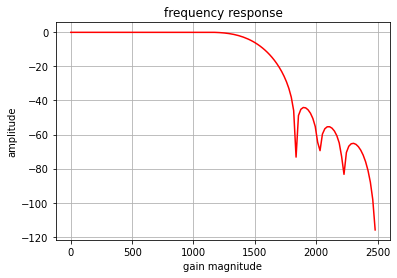

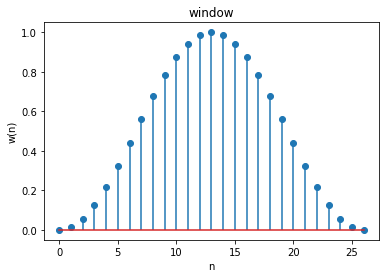

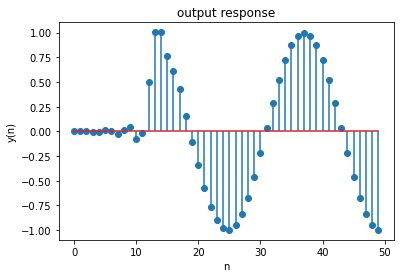

Text(0, 0.5, 'hd(n)')

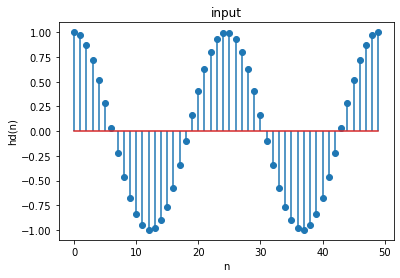

In [0]:
# -*- coding: utf-8 -*-
"""
FIR Filter analysis
"""

from numpy import cos,log10,abs,pi,linspace
import matplotlib.pyplot as plt
from scipy.signal import freqz,lfilter
from scipy.signal import firwin,hanning,bartlett,hamming,boxcar,blackman,hann

fpa=int(input('enter passband edge frequency:'))
fsa=int(input('enter stopband edge frequency:'))
N=int(input('enter order of filter'))
Fs=int(input('enter sampling freq:'))
n1=linspace(0,100)
x1=cos(2*pi*100*n1/Fs)
#x2=cos(2*pi*1500*n1/Fs)
#x3=cos(2*pi*4000*n1/Fs) Does not function the same way as in matlab where you can combine more than 1 waveform
#x=x1+x2+x3
fc=(fpa+fsa)/2

hn=firwin(N,fc/(Fs/2),window="hanning") #good for output but not while plotting window function(Gibbs factor)
A=hann(N+1)  #needed for plotting window function as it is

w,h=freqz(hn,1,128)
mag=20*log10(abs(h))

y=lfilter(hn,1,x1)

plt.plot((w*Fs/(2*pi)),mag,'r')
plt.title('frequency response')
plt.xlabel('gain magnitude')
plt.grid()
plt.ylabel('amplitude')
plt.show()

plt.stem(A,use_line_collection=True)
plt.title('window')
plt.xlabel('n')
plt.ylabel('w(n)')
plt.show()

plt.stem(y,use_line_collection=True)
plt.title('output response')
plt.xlabel('n')
plt.ylabel('y(n)')
plt.show()

plt.stem(x1,use_line_collection=True)
plt.title('input')
plt.xlabel('n')
plt.ylabel('hd(n)')

PB freq:1000
S.B freq:2500
sampling freq:5000
passband attn:2
stopband attn:15


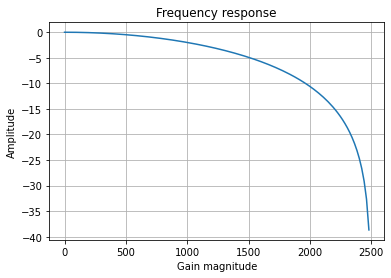

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


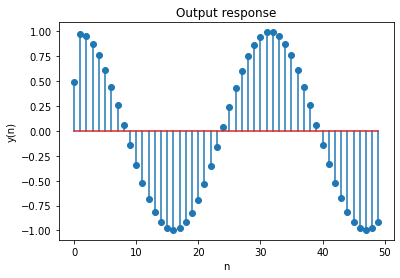

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


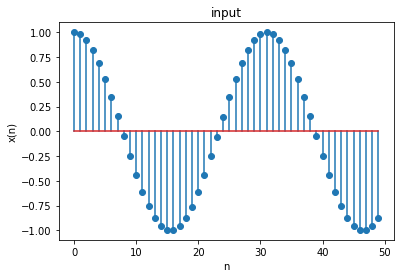

In [0]:
"""IIR butterworth and Chebyshev  filter """

from numpy import pi,tan,linspace,cos,log10
from scipy.signal import butter,buttord,TransferFunction,freqz,bilinear,lfilter
from scipy.signal import cheb1ord,cheby1,qmf
import matplotlib.pyplot as plt


fpa=int(input('PB freq:'))
fsa=int(input('S.B freq:'))
fs=int(input('sampling freq:'))
rp=int(input('passband attn:'))
rs=int(input('stopband attn:'))

n=linspace(0,79)
x1=cos(2*pi*100*n/fs)
x2=cos(2*pi*1500*n/fs)
x3=cos(2*pi*4000*n/fs)


wpd=2*pi*fpa/fs
wsd=2*pi*fsa/fs

pwpa=2*tan(wpd/2)
pwsa=2*tan(wsd/2)

N,wn=buttord(pwpa,pwsa,rp,rs,True)

#N,wn=cheb1ord(pwpa,pwsa,rp,rs,True)

#b,a=cheby1(N,rp,wn,'low',True)

b,a=butter(N,wn,'low',True)
Fs=1
num,den=bilinear(b,a,Fs)

sys=TransferFunction(b,a,dt=1)

w,h=freqz(num,den,128)

plt.plot((w*fs/(2*pi)),20*log10(abs(h)))
plt.grid()
plt.title('Frequency response')
plt.xlabel('Gain magnitude')
plt.ylabel('Amplitude')

plt.show()

y=lfilter(num,den,x1)

plt.stem(y,use_line_collection=True)
plt.title('Output response')
plt.xlabel('n')
plt.ylabel('y(n)')

plt.show()

plt.stem(x1,use_line_collection=True)
plt.title('input')
plt.xlabel('n')
plt.ylabel('x(n)')

plt.show()

PB freq:1000
S.B freq:2500
sampling freq:5000
passband attn:2
stopband attn:15


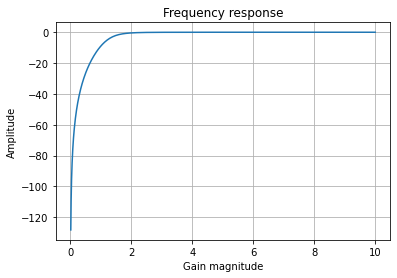

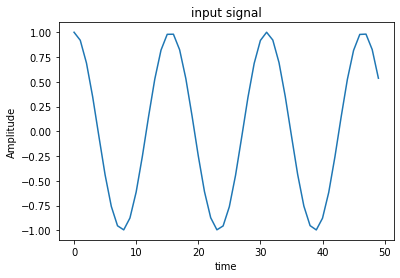

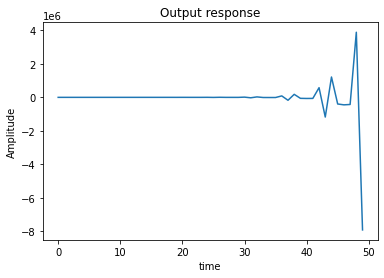

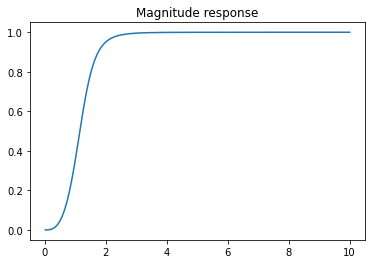

In [0]:
"""IIR butterworth and Chebyshev  filter """

from numpy import pi,linspace,cos,log10
from scipy.signal import butter,buttord,TransferFunction,lfilter,freqs
from scipy.signal import cheb1ord,cheby1
import matplotlib.pyplot as plt


fpa=int(input('PB freq:'))
fsa=int(input('S.B freq:'))
fs=int(input('sampling freq:'))                           #To switch between Butterworth and Chebyshev filter 
rp=int(input('passband attn:'))                         # uncomment/comment lines 25,27,29,31
rs=int(input('stopband attn:'))
                                                        #To change between lowpass and high pass
                                                        #Replace 'low' with 'high' or vice versa
n=linspace(0,79)
x1=cos(2*pi*200*n/fs)   

#x2=cos(2*pi*1500*n/fs)
#x3=cos(2*pi*4000*n/fs)

wpd=2*pi*fpa/fs
wsd=2*pi*fsa/fs


N,wn=buttord(wpd,wsd,rp,rs,True) #Calculate order of the given filter with given set of specifications

#N,wn=cheb1ord(wpd,wsd,rp,rs,True)


#b,a=cheby1(N,rp,wn,'low',True)

b,a=butter(N,wn,'high',True)  #Compute the given transfer function 



sys=TransferFunction(b,a) #Frequency response calculation

w,h=freqs(b,a)

plt.plot(w,20*log10(abs(h)))
plt.grid()
plt.title('Frequency response')
plt.xlabel('Gain magnitude')
plt.ylabel('Amplitude')

plt.show()

y=lfilter(b,a,x1)

plt.plot(x1)
plt.title('input signal')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()

plt.plot(y)
plt.title('Output response')
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.show()

plt.plot(w,abs(h))
plt.title('Magnitude response')
plt.show()